# Learning Rate Schedules

This notebooks demonstrates a basic implementation of the most commonly used Learning Rate Schedules in Deep Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from tensorflow.keras.callbacks import LearningRateScheduler

In [2]:
epochs = np.arange(50)

def plot_lr_schedule(lr_func, lr_init):
    lr = [lr_init] 
    for e in epochs[1:]:
        lr.append(lr_func(e, lr[-1]))
    plt.plot(epochs, lr)
    plt.title(' '.join(x.title() for x in lr_func.__name__.split('_')), fontsize=18)

# Linear Warmup
Linear Warmup is a learning rate schedule where we linearly increase the learning rate from a low rate to a constant rate thereafter. This reduces volatility in the early stages of training.

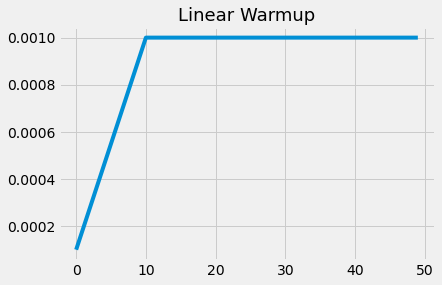

In [3]:
MIN_LR = 1e-4
MAX_LR = 1e-3
N_WARMUP_EPOCHS = 10
RATE = (MAX_LR - MIN_LR) / N_WARMUP_EPOCHS

def linear_warmup(epoch, lr):
    if epoch <= N_WARMUP_EPOCHS:
        return epoch * RATE + MIN_LR
    return lr

plot_lr_schedule(linear_warmup, MIN_LR)

# Linear Warmup With Linear Decay
Linear Warmup With Linear Decay is a learning rate schedule in which we increase the learning rate linearly for $n$ updates and then linearly decay afterwards.

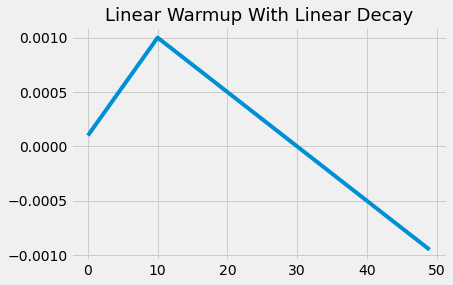

In [4]:
INIT_LR = 1e-4
MAX_LR = 1e-3
N_WARMUP_EPOCHS = 10
DECAY = 5e-5
RATE = (MAX_LR - MIN_LR) / N_WARMUP_EPOCHS

def linear_warmup_with_linear_decay(epoch, lr):
    if epoch < 10:
        return epoch * RATE + MIN_LR
    return MAX_LR - ((epoch - N_WARMUP_EPOCHS) * DECAY)

plot_lr_schedule(linear_warmup_with_linear_decay, INIT_LR)

# Cosine Annealing

Cosine Annealing is a type of learning rate schedule that has the effect of starting with a large learning rate that is relatively rapidly decreased to a minimum value before being increased rapidly again. The resetting of the learning rate acts like a simulated restart of the learning process and the re-use of good weights as the starting point of the restart is referred to as a "warm restart" in contrast to a "cold restart" where a new set of small random numbers may be used as a starting point.

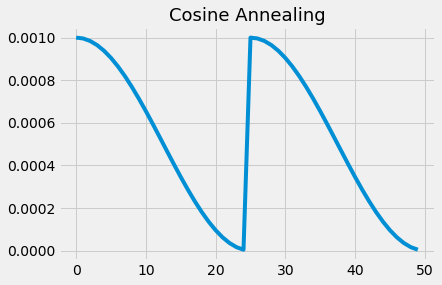

In [5]:
EPOCHS_PER_CYCLE = 25
MAX_LR = 1e-3

from math import pi, cos, floor

def cosine_annealing(epoch, lr):
    cos_inner = (pi * (epoch % EPOCHS_PER_CYCLE)) / (EPOCHS_PER_CYCLE)
    return MAX_LR/2 * (cos(cos_inner) + 1)

plot_lr_schedule(cosine_annealing, MAX_LR)

# Linear Warmup With Cosine Annealing
Linear Warmup With Cosine Annealing is a learning rate schedule where we increase the learning rate linearly for $n$ updates and then anneal according to a cosine schedule afterwards.

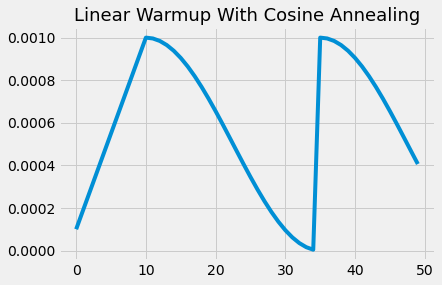

In [6]:
EPOCHS_PER_CYCLE = 25
MAX_LR = 1e-3
MIN_LR = 1e-4
N_WARMUP_EPOCHS = 10
RATE = (MAX_LR - MIN_LR) / N_WARMUP_EPOCHS

from math import pi, cos, floor

def linear_warmup_with_cosine_annealing(epoch, lr):
    if epoch <= N_WARMUP_EPOCHS:
        return epoch * RATE + MIN_LR
    cos_inner = (pi * ((epoch-N_WARMUP_EPOCHS) % EPOCHS_PER_CYCLE)) / (EPOCHS_PER_CYCLE)
    return MAX_LR/2 * (cos(cos_inner) + 1)

plot_lr_schedule(linear_warmup_with_cosine_annealing, MIN_LR)

# Inverse Square Root Schedule
Inverse Square Root is a learning rate schedule $ 1 / \sqrt{(max(n, k)} $ where $n$ is the current training iteration and $k$ is the number of warm-up steps. This sets a constant learning rate for the first $k$ steps, then exponentially decays the learning rate until pre-training is over.

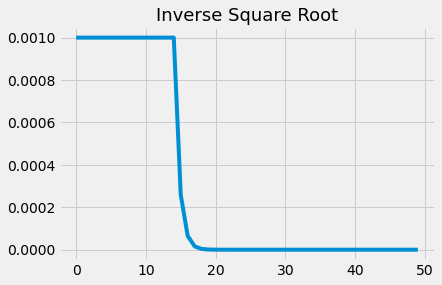

In [7]:
N_WARMUP_EPOCHS = 15
INIT_LR = 1e-3

def inverse_square_root(epoch, lr):
    if epoch < N_WARMUP_EPOCHS:
        return INIT_LR
    return lr * 1/np.sqrt(np.max([epoch, N_WARMUP_EPOCHS]))

plot_lr_schedule(inverse_square_root, INIT_LR)

# Step Decay
Step Decay is a learning rate schedule that drops the learning rate by a factor every few epochs, where the number of epochs is a hyperparameter.

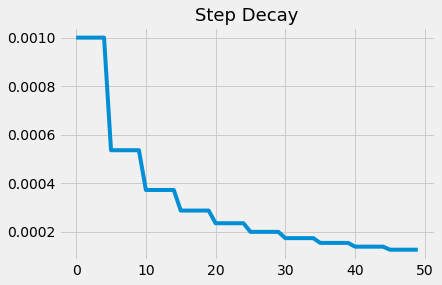

In [8]:
STEP_SIZE = 5
DECAY = 0.9
INIT_LR = 1e-3

def step_decay(epoch, lr):
    step = (epoch // STEP_SIZE) + 1
    return INIT_LR / (step ** DECAY)

plot_lr_schedule(step_decay, INIT_LR)

# Exponential Decay
Exponential Decay is a learning rate schedule where we decay the learning rate with more iterations using an exponential function

$ lr = lr_0 \exp(-kt) $

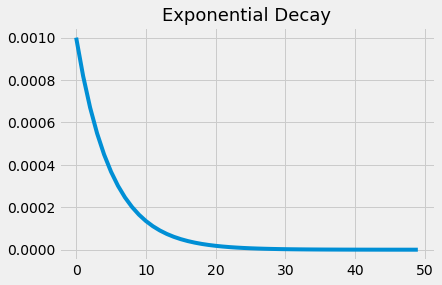

In [9]:
INIT_LR = 1e-3
K = 0.2

def exponential_decay(epoch, lr):
    return INIT_LR * np.exp(-1 * K * epoch)

plot_lr_schedule(exponential_decay, INIT_LR)

# Cyclical Learning Rate Policy
A Cyclical Learning Rate Policy combines a linear learning rate decay with warm restarts.

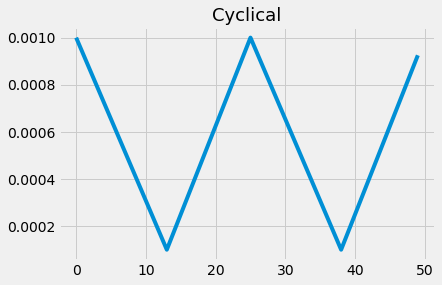

In [10]:
N_DECAY_EPOCHS = 13
EPOCHS_PER_CYCLE = 25
MIN_LR = 1e-4
MAX_LR = 1e-3
GROW_RATE = (MAX_LR - MIN_LR) / (EPOCHS_PER_CYCLE - N_DECAY_EPOCHS)
DECAY_RATE = (MAX_LR - MIN_LR) / N_DECAY_EPOCHS

def cyclical(epoch, lr):
    epoch = epoch % EPOCHS_PER_CYCLE
    if epoch < N_DECAY_EPOCHS:
        return MAX_LR - (DECAY_RATE * epoch)
    return MIN_LR + (GROW_RATE * (epoch - N_DECAY_EPOCHS))

plot_lr_schedule(cyclical, MAX_LR)